# Анализ оттока клиентов банка "Метанпромбанк"

Датасет, поступивший к анализу, содержит данные о клиентах банка «Метанпромбанк». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск. 

Заказчик - отдел маркетинга “Метанпромбанка”.

**Цель:**  исследование оттока клиентов из банка «Метанпромбанк».

**Задачи:**
- проанализировать клиентов регионального банка;
- выделить сегменты клиентов, склонных уходить из банка;
- дать рекомендации по удержанию отточных клиентов.

**План работы:**

1. Загрузка и описание данных

2. Предобработка данных
         
3. Исследовательский анализ данных

4. Проверка статистических гипотез
   
5. Общие выводы по исследовательскому анализу

6. Сегментация клиентов по признакам отточности

7. Общие выводы по исследованию

## 1. Загрузка и описание данных

Перед началом работы загрузим все необходимые для проведения исследования библиотеки:

In [1]:
import pandas as pd # импортируем pandas для работы с таблицами

import numpy as np # импортируем библиотеку numpy для работы с массивами

from datetime import datetime, timedelta # импортируем библиотеку datetime для работы с данными 
#в формате даты и времени

from matplotlib import pyplot as plt # импортируем библиотеку pyplot для работы с графиками

import seaborn as sns # импортируем библиотеку seaborn для работы с инструментами визуализации

from scipy import stats as st # импортируем библиотеку scipy.stats для работы со статистическимм тестами

import math as mth # импортируем библиотеку math для выполнения математических операций

from plotly import graph_objects as go # импортируем библиотеку plotly.express для работы с инструментами 
#визуализации

Загружаем данные:

In [2]:
df = pd.read_csv('bank_scrooge.csv')
df

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


Познакомимся с данными поближе, используя метод info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


<h6>ВЫВОД:<h6>

На вход был получен датасет с данными о клиентах банка "Метанпромбанк", состоящий из 10 тысяч строк. Таблица содержит 11 столбцов. Первый столбец - id клиента, все остальные столбцы представляют собой разнообразные характеристики клиента: пол, возраст, кредитный рейтинг, город и др. Названия столбцов прописаны в разных регистрах и стилистиках (с нижним подчеркиванием и без него). Сразу бросаются в глаза пропуски в столбцах с возрастом клиента и балансом на счете. Типы данных: int64, float64, object, изменение типов данных не потребуется.  

## 2. Предобработка данных

На предыдущем шаге было обнаружено, что названия столбцов датафрейма прописаны в разном регистре и стилистике. Скорректируем заголовки, приведя все к нижнему регистру и добавив нижние подчеркивания вместо пробелов.

In [4]:
df = df.rename(columns = {'USERID':'user_id', 'EST_SALARY':'salary'})
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Вызов метода info показал наличие пропусков в столбцах age и balance, подсчитаем их:

In [5]:
print(f"Количество пропусков в столбце age: {df['age'].isna().sum()}. \
Это составляет {df['age'].isna().sum()/len(df)*100}% от общего числа строк ")

print(f"Количество пропусков в столбце balance: {df['balance'].isna().sum()}. \
Это составляет {df['balance'].isna().sum()/len(df)*100}% от общего числа строк ")

Количество пропусков в столбце age: 26. Это составляет 0.26% от общего числа строк 
Количество пропусков в столбце balance: 2295. Это составляет 22.95% от общего числа строк 


Так как количество пропусков в столбце с возрастом клиентов составляет всего 0,26% от общего числа строк в таблице, можем удалить эти пропуски:

In [6]:
df = df.dropna(subset=['age'])
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


Количество пропусков в столбце balance составлет почти 23% от общего числа строк в таблице. Удалить мы их не можем, так как это значительно исказит результаты исследования. Попробуем разобраться с природой пропущенных значений в этом столбце, после чего решим, как их можно обработать.


Создадим новый признак, принимающий 1, если для клиента отсутствует значение в столбце balance, и 0, если значение не пропущено. 

In [7]:
df['missing_data'] = df['balance'].isna().astype(int)
df['missing_data']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Name: missing_data, Length: 9974, dtype: int64

Построим сводную таблицу, в которой будут отображаться меры центральной тенденции для каждого из признаков, отдельно для клиентов, у которых значение balance пропущено (1), и для клиентов, у которых нет пропусков в balance(0):

In [8]:
df.pivot_table(
    columns= 'missing_data', 
    
    values = ['score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'salary'],
    
    aggfunc = {'age': 'mean', 
               'salary': 'mean',
               
               'equity': 'median',
               'products': 'median',
               'score': 'median',
               
               'gender': lambda x: pd.Series.mode(x)[0], 
              'city': lambda x: pd.Series.mode(x)[0]} 
             )

missing_data,0,1
age,42.924366,42.093023
city,Ярославль,Ярославль
equity,4.0,0.0
gender,Ж,М
products,2.0,1.0
salary,124520.394264,226345.417464
score,840.0,903.0


Сразу бросается в глаза разница в доходе клиентов, для которых сумма balance прописана и для которых сумма balance пропущена. Сумма дохода для клиентов с пропусками в balance больше, чем для клиентов без пропущенных значений в этом столбц, почти в два раза.

Кроме того, различается медианное количество баллов недвижимости для этих двух групп клиентов. Изучим это различие, построив гистограмму распределения баллов недвижимости:

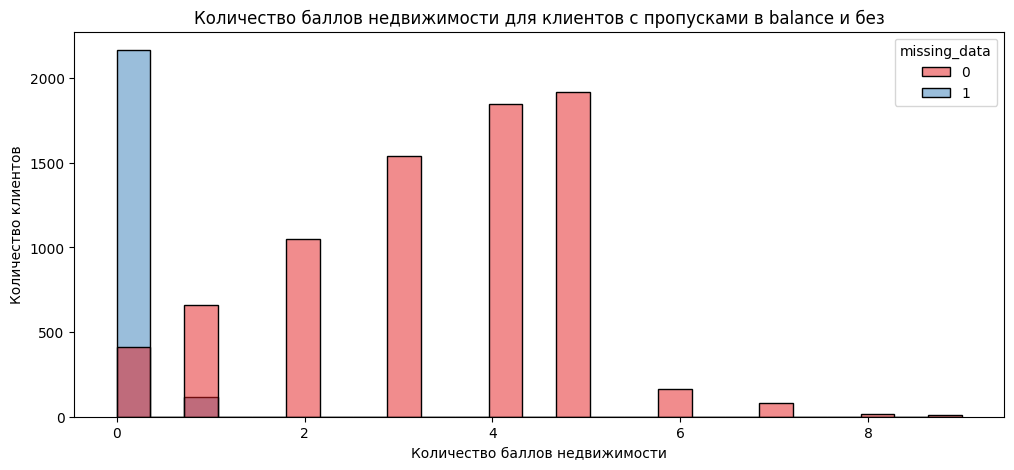

In [9]:
plt. figure(figsize=(12, 5))
sns.histplot(data=df, x='equity', hue='missing_data', palette='Set1')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество баллов недвижимости')
plt.title('Количество баллов недвижимости для клиентов с пропусками в balance и без')
plt.show()

Судя по распределению количества баллов недвижимости для клиентов с пропусками в balance и без таковых, чаще всего пропуски встречаются в строчках с данными о клиентах, у которых нет недвижимости. 

Таким образом, между наличием пропущенных значений в balance и другими характеристиками клиента (equity) есть некоторая связь. Значит, пропуски в balance можно отнести к типу MAR (Missing At Random / Отсутствует случайно)

Как уже было указано ранее, удалить строки с пропусками в этом столбце мы не можем, их количество превышает 22% от общего объема данных. Другие возможные варианты обработки пропусков данного типа: заполнение медианным значением balance для людей с нулевым equity или умышленное незаполнение пропусков. Ввиду большого количества пропусков и неоднозначности их природы, выберем второй вариант и оставим пропуски без изменений. 

Следующим шагом определим наличие дубликатов в датафрейме:

In [10]:
df.duplicated().sum()

0

Явных дубликатов необнаружено. Проверим также наличие неявных дубликатов по столбцу user_id:

In [11]:
df.duplicated(subset='user_id', keep=False).sum()

100

В таблице есть 100 повторяющихся user_id, посмотрим, что это за клиенты:

In [12]:
df[df.duplicated(subset='user_id', keep=False)].sort_values(by='user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,missing_data
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,1
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,1
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1,0
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1,0


По таблице с дубликатами заметно, что для двух клиентов с одним user_id, для одного признак отточности (churn) всегда будет равен 1. Кроме того, для этих клиентов почти всегда будут отличаться пол, возраст и город. Таким образом, делаем вывод, что под одним user_id могут числиться несколько разных клиентов. Объяснением этому может быть тот факт, что когда клиент покидает банк, его user_id переходит к новому пользователю. Так как мы изучаем отток пользователей из банка, нам важно сохранить данные и об отточных пользователях, и о лояльных, поэтому в контексте нашей задачи, удалять строки с повторяющимися user_id будет неправильно.

Далее создадим вспомогательные для дальнейшего анализа столбцы с кодом категориальных переменных: пола и города клиентов.

In [13]:
df['gender_code'] = df['gender']
df['city_code'] = df['city']

df = pd.get_dummies(data = df, columns = ['gender_code', 'city_code'])
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,missing_data,gender_code_Ж,gender_code_М,city_code_Ростов,city_code_Рыбинск,city_code_Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,True,False,False,True,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,True,False,False,True,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,True,False,False,True,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,True,False,False,False,True
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,False,True,False,True,False
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,1,False,True,False,False,True
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,1,False,True,False,False,True
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0,True,False,False,False,True


С помощью метода get_dummies получили 5 вспомогательных столбцов с кодом пола и города клиентов. Один столбец - одно значение из соответсвующих столбцов. 0 - клиент не обладает признаком, 1 - клиент обладает признаком.

<h6>ВЫВОД:<h6>

В ходе предобработки исходных данных были выполнены следующие мероприятия:
- названия столбцов датафрейма приведены к единому регистру и стилистике,
- проведен подсчет и обработка пропущенных значений,
- проведен подсчет и анализ дубликатов,
- созданы дополнительные столбцы с кодами категориальных признаков - город и пол.

Таким образом, из таблицы были удалены пропуски в столбце age, которые составляли 0,26% от общего числа строк в таблице. Пропуски в столбце balance составляли 22% от общего числа строк в таблице, с целью не исказить результаты исследования, их было принято решение оставить без изменений.

Явных дубликатов обнаружено не было. Поиск неявных дубликатов по столбцу user_id показал, что под одним user_id могут числиться несколько разных клиентов. Это может быть связано с тем, что когда клиент покидает банк, его user_id переходит к новому пользователю. В связи с тем, что целью нашего исследования является изучение оттока пользователей, дубликаты по user_id также было принято решение оставить без изменений.

С помощью метода get_dummies были созданы 5 вспомогательных столбцов с кодом пола и города клиентов.

## 3. Исследовательский анализ данных

### 3.1 Анализ распределения признаков среди ушедших клиентов банка

Проанализируем распределение признаков для отточных и лояльных клиентов.

Построим гистограммы распределений непрерывных признаков: score, age, balance, salary.

Выведем график распределения **кредитного рейтинга** в зависисмости от типа клиента:

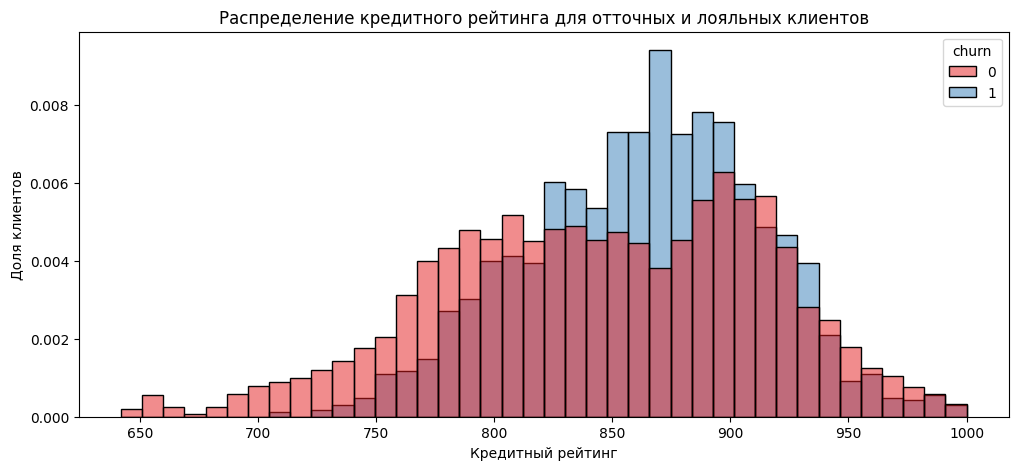

In [14]:
plt. figure(figsize=(12, 5))
sns.histplot(data=df, x='score', hue='churn', stat='density', common_norm=False, palette='Set1')
plt.ylabel('Доля клиентов')
plt.xlabel('Кредитный рейтинг')
plt.title('Распределение кредитного рейтинга для отточных и лояльных клиентов')
plt.show()

По гистограмме заметно, что наиболее низкий кредитный рейтинг имеют лояльные клиенты. Тогда как отточные клиенты в среднем имеют более высокий кредитный рейтинг. Наиболее распространенный показатель кредитного рейтинга для отточных клиентов лежит в промежутке между 820 и 900 баллов.

Выведем график распределения **возраста** в зависисмости от типа клиента:

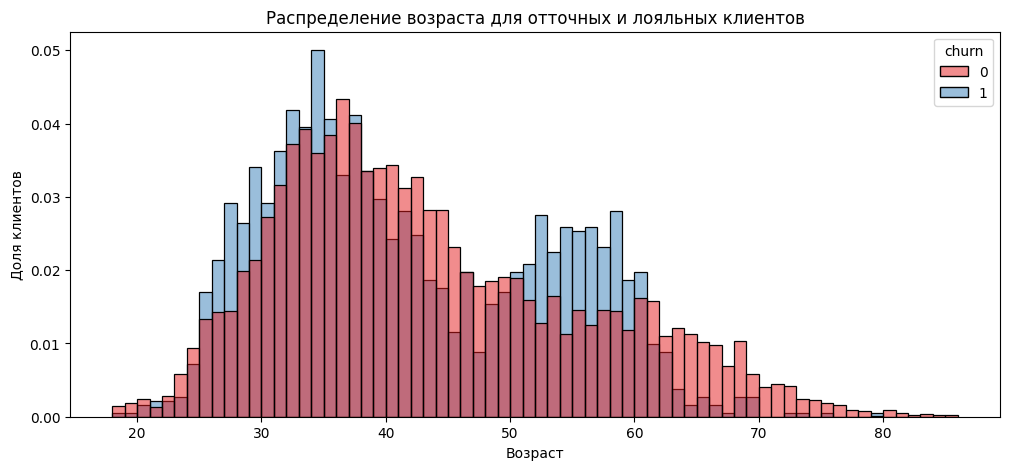

In [15]:
plt. figure(figsize=(12, 5))
sns.histplot(data=df, x='age', hue='churn', stat='density', common_norm=False, palette='Set1', binwidth=1)
plt.ylabel('Доля клиентов')
plt.xlabel('Возраст')
plt.title('Распределение возраста для отточных и лояльных клиентов')
plt.show()

Гистограмма распределения возраста клиентов показала, что для большинства возрастных групп доля лояльных и отточных пользователей примерно одинакова. Для отточных пользователей самый распространенный возраст - от 28 до 35 лет. В возрастной группе от 40 до 50 лет наблюдается большее количество лояльных клиентов. В группе от 50 до 60 лет преобладают отточные пользователи. Среди клиентов в возрасте старще 60 лет большинство - лояльных. Клиентов в возрасте до 25 и в возрасте старше 70 в целом достаточно малое количество.

Выведем график распределения **баланса на счете** в зависисмости от типа клиента. Для наглядности ограничим значения по оси **х** (Баланс на счете) суммой **5 миллионов**:

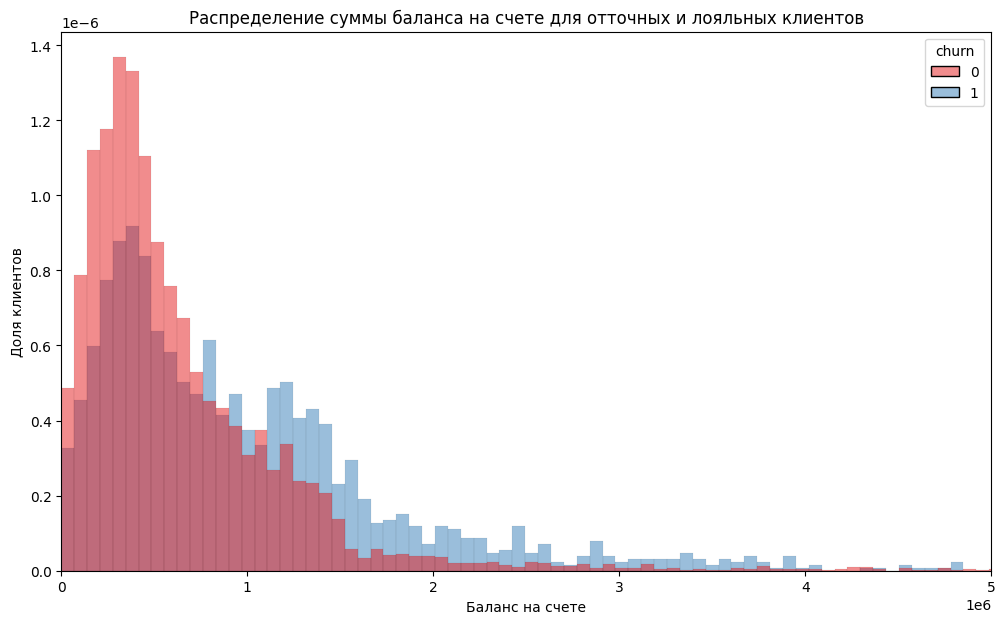

In [16]:
plt. figure(figsize=(12, 7))
sns.histplot(data=df, x='balance', hue='churn', palette='Set1', stat='density', common_norm=False)
plt.ylabel('Доля клиентов')
plt.xlabel('Баланс на счете')
plt.xlim(0, 5000000)
plt.title('Распределение суммы баланса на счете для отточных и лояльных клиентов')
plt.show()

У большей части пользователей баланс на счете составляет до 1,5 миллионов. Однако в целом размах по суммам остатка очень большой. Наиболее распространенная сумма баланса для лояльных клиентов лежит на отрезке до ~800 тысяч. Примерно та же картина наблюдается для отточных пользователей. В то же время, доля клиентов с более высоким балансом, как правило выше среди отточных, чем среди лояльных.

Выведем график распределения **дохода** в зависисмости от типа клиента. Для наглядности ограничим значения по оси **х** (Доход) суммой **600 тысяч**:

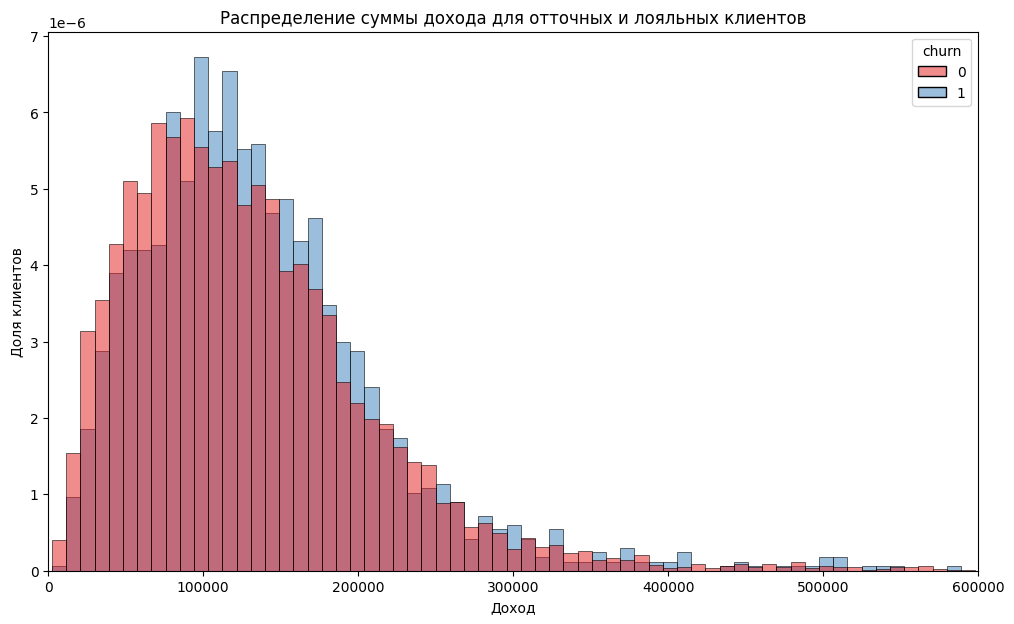

In [17]:
plt. figure(figsize=(12, 7))
sns.histplot(data=df, x='salary', hue='churn', palette='Set1', stat='density', common_norm=False)
plt.ylabel('Доля клиентов')
plt.xlabel('Доход')
plt.xlim(0, 600000)
plt.title('Распределение суммы дохода для отточных и лояльных клиентов')
plt.show()

Абсолютное большинство пользователей имеет доход 200 тысяч. В доходной группе до ~80 тысяч преобладают лояльные пользователи. Среди отточных пользователей наиболее распространенный размер дохода от 80 до 150 тысяч. Начиная с отметки в 80 тысяч доля отточных пользователей чаще преобладает над лояльными клиентами. 

Теперь, чтобы оценить распределение дискретных признаков клиентов, построим для них столбчатые диаграммы:

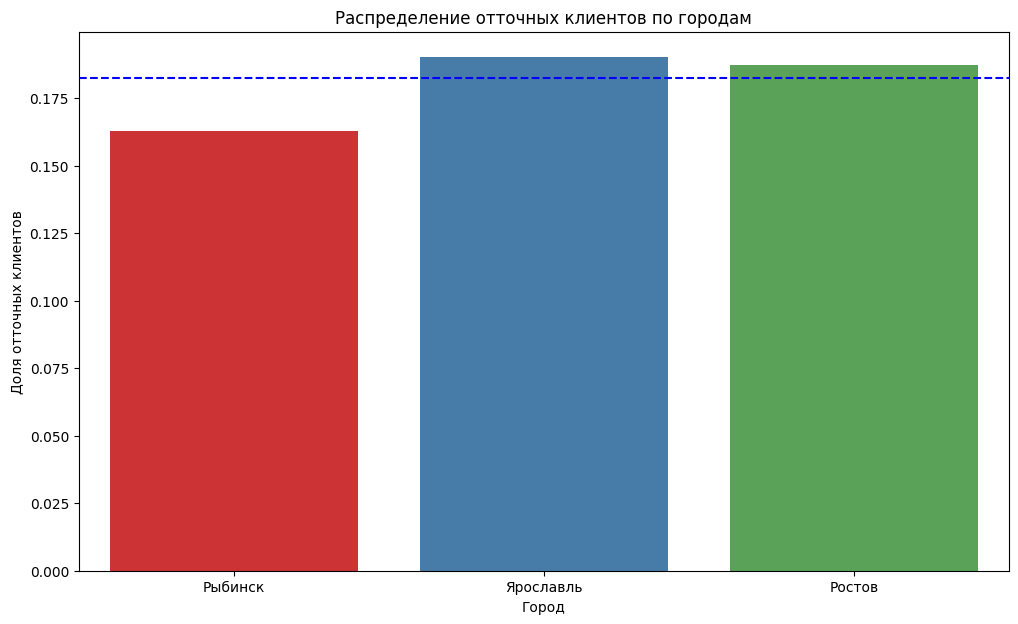

In [18]:
plt. figure(figsize=(12, 7))
sns.barplot(data=df, x='city', y='churn', hue='city', palette='Set1', legend=False, errorbar=None)
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Город')
plt.title('Распределение отточных клиентов по городам')
plt.axhline(y=df['churn'].mean(), color='blue', linestyle='--')
plt.show()

Доля отточных пользователей наиболее высокая в Ярославле. Немного от Ярославля отстает Ростов, уровень оттока пользователей в этих городах выше, чем по банку в целом. Наименьшая доля отточных пользователей находится в Рыбинске.

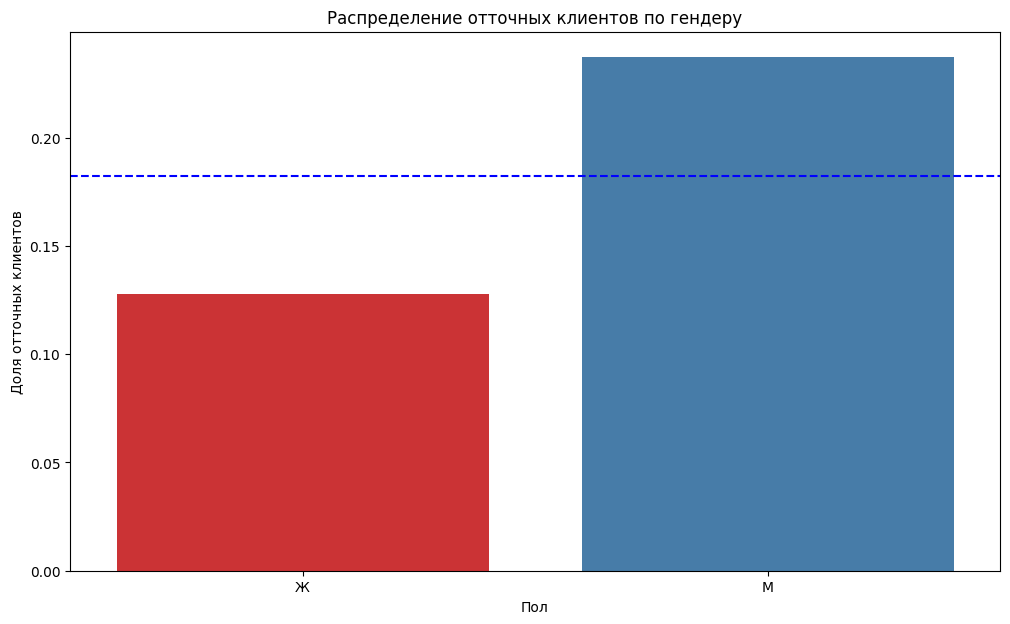

In [19]:
plt. figure(figsize=(12, 7))
sns.barplot(data=df, x='gender', y='churn', hue='gender', palette='Set1', legend=False, errorbar=None)
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Пол')
plt.title('Распределение отточных клиентов по гендеру')
plt.axhline(y=df['churn'].mean(), color='blue', linestyle='--')
plt.show()

Доля отточных клиентов среди мужчин значительно выше, чем среди женщин. Доля отточных клиентов-мужчин значительно выше средней по банку.

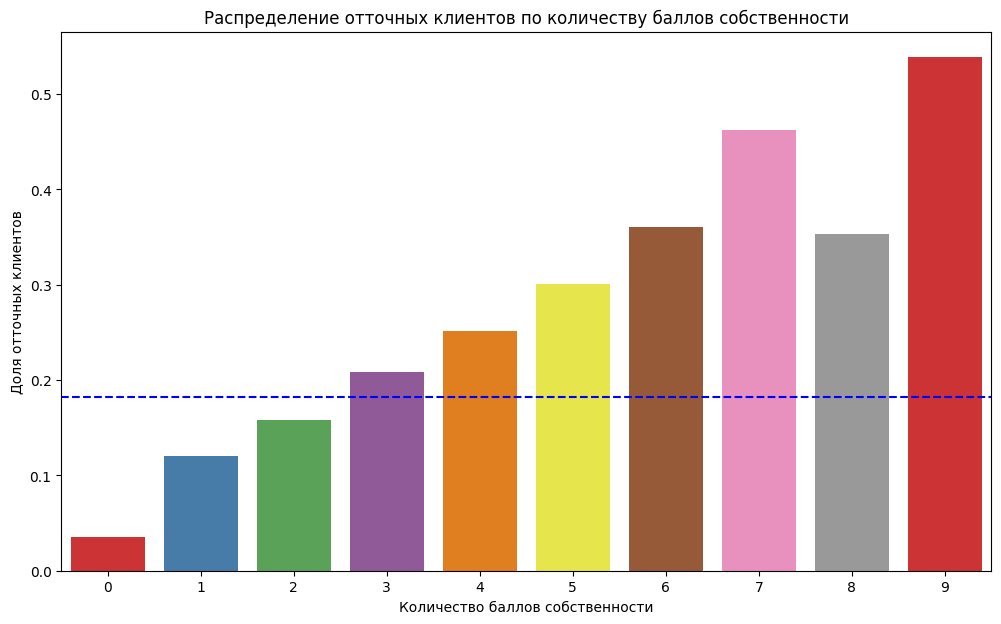

In [20]:
plt. figure(figsize=(12, 7))
sns.barplot(data=df, x='equity', y='churn', hue='equity', palette='Set1', legend=False, errorbar=None)
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Количество баллов собственности')
plt.title('Распределение отточных клиентов по количеству баллов собственности')
plt.axhline(y=df['churn'].mean(), color='blue', linestyle='--')
plt.show()

Наибольшее количество отточных клиентов принадлежат к группам 3-9 баллов собственности. Доля отточных клиентов внутри этих групп значительно выше средней по банку. Как правило, чем выше балл собственности, тем выше среди клиентов с таким баллом, уровень оттока. 

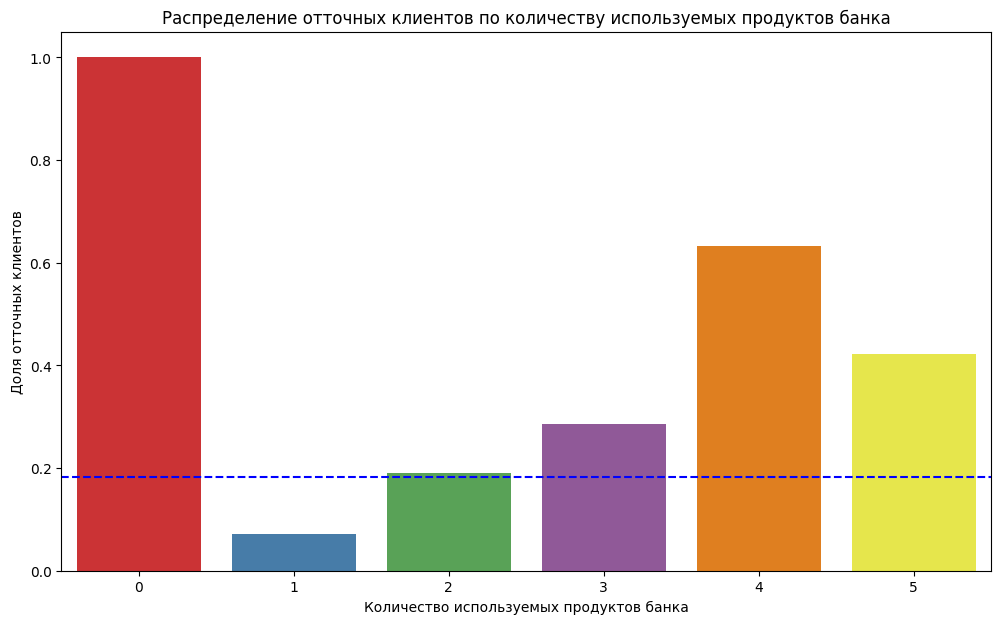

In [21]:
plt. figure(figsize=(12, 7))
sns.barplot(data=df, x='products', y='churn', hue='products', palette='Set1', legend=False, errorbar=None)
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Количество используемых продуктов банка')
plt.title('Распределение отточных клиентов по количеству используемых продуктов банка')
plt.axhline(y=df['churn'].mean(), color='blue', linestyle='--')
plt.show()

В целом, почти все группы пользователей, кроме клиентов с 1 продуктом, превышают средний по банку уровень отточности. 

Наивысшей показатель отточности демонстрируют клиенты, которые не используют ни одного продукта банка. Это подозрительно. Посчитаем, сколько всего клиентов у нас не использует ни одного продукта:

In [22]:
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,missing_data,gender_code_Ж,gender_code_М,city_code_Ростов,city_code_Рыбинск,city_code_Ярославль
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1,True,False,False,True,False


Всего один клиент. Похоже на аномалию, так как клиент, который не пользовался услугами банка, не показателен для анализа оттока. Можем удалить:

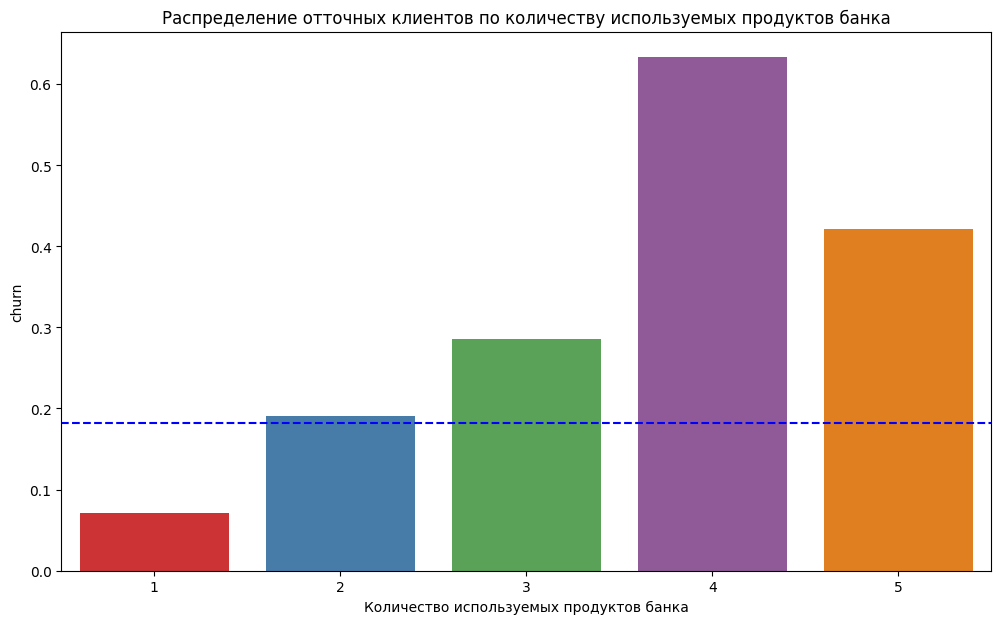

In [23]:
df = df[df['products']>0]

plt. figure(figsize=(12, 7))
sns.barplot(data=df, x='products', y='churn', hue='products', palette='Set1', legend=False, errorbar=None)
plt.xlabel('Количество используемых продуктов банка')
plt.title('Распределение отточных клиентов по количеству используемых продуктов банка')
plt.axhline(y=df['churn'].mean(), color='blue', linestyle='--')
plt.show()

Теперь наивысший показатель отточности демонстрируют клиенты с 4 продуктами банка. Все группы клиентов с количеством продуктов равным 3 и больше значительно превышают средний по банку уровень отточности.

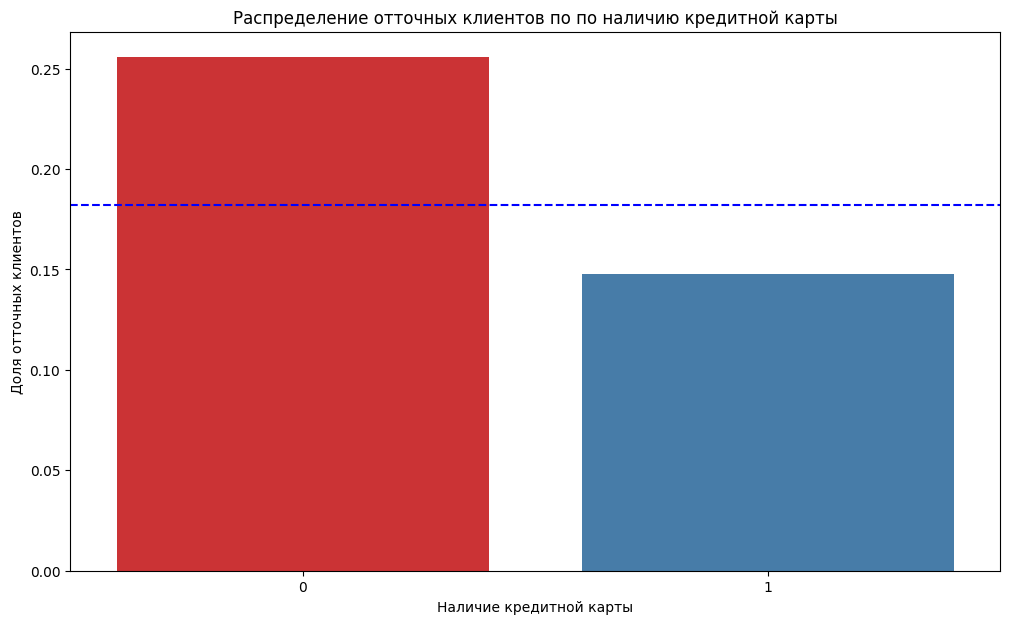

In [24]:
plt. figure(figsize=(12, 7))
sns.barplot(data=df, x='credit_card', y='churn', hue='credit_card', palette='Set1', legend=False, errorbar=None)
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Наличие кредитной карты')
plt.title('Распределение отточных клиентов по по наличию кредитной карты')
plt.axhline(y=df['churn'].mean(), color='blue', linestyle='--')
plt.show()

Уровень отточности выше для клиентов не использующих кредитную карту.

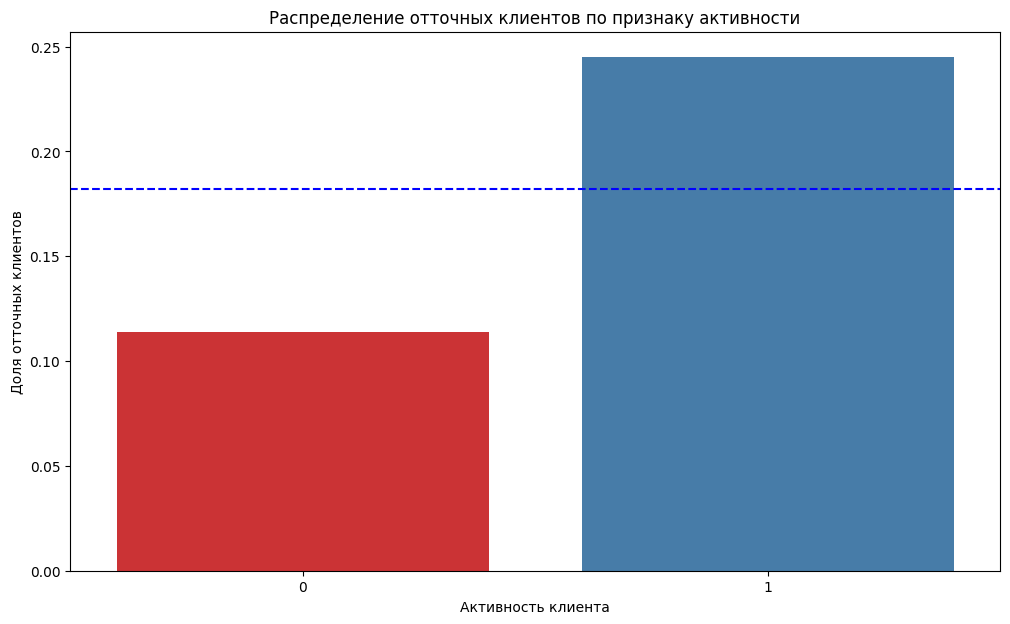

In [25]:
plt. figure(figsize=(12, 7))
sns.barplot(data=df, x='last_activity', y='churn', hue='last_activity', palette='Set1', legend=False, errorbar=None)
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Активность клиента')
plt.title('Распределение отточных клиентов по признаку активности')
plt.axhline(y=df['churn'].mean(), color='blue', linestyle='--')
plt.show()

Неожиданно, но среди неактивных клиентов уровень оттока значительно ниже, чем среди активных. Для активных клиентов уровень оттока значительно превышает средний по банку.

### 3.2 Корреляционный анализ зависимости отточности от признаков

Изучим связь параметров клиентов с их оттоком. Для этого будем рассчитывать корреляцию признаков с признаком оттока.

Построим тепловую диаграмму, которая покажет взаимосвязь признаков клиентов между собой, предварительно удалив из таблицы user_id и строковые значения.

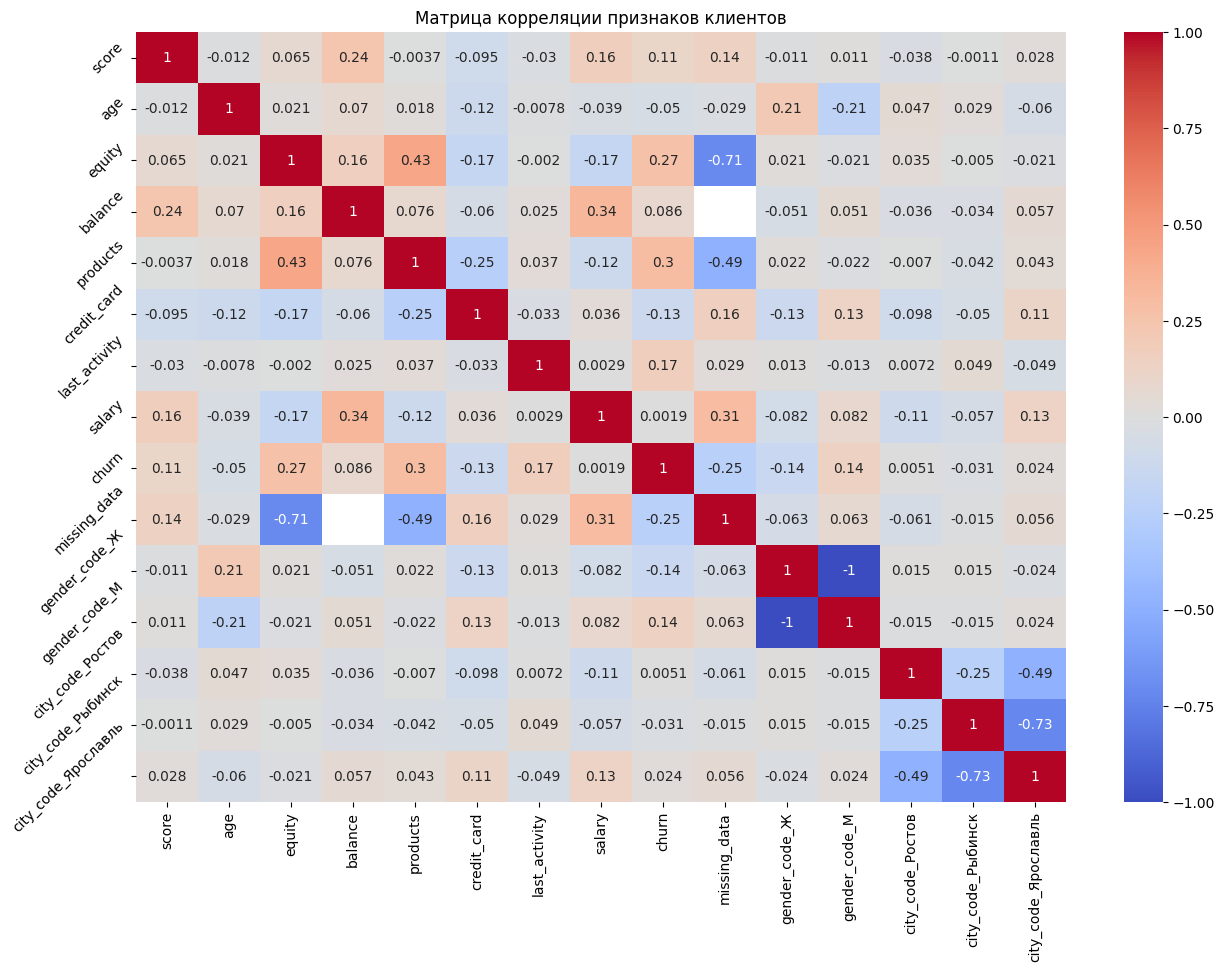

In [26]:
plt. figure(figsize=(15, 10))
corr = df.drop(['user_id', 'city', 'gender'], axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0)
plt.title('Матрица корреляции признаков клиентов')
plt.yticks(rotation=45)
plt.show()

Обратим внимание на строку churn на диаграмме, пройдемся по значениям в этой строке, чтобы сравнить коэффициенты корреляции признака отточности и других характеристик клиентов.

Для интерпретации результатов будем использовать шкалу Чеддока, согласно которой, коэффициент корреляции 0,1 обозначает слабую взаимосвязь. Все, что ниже этого показателя, будем считать не влияющим на отток.

Наиболее высокий показатель корреляции в строке наблюдается по признаку "количество продуктов, используемых клиентом". Коэффициент корреляции для этого признака и признака отточности составляет 0,3. Данное значение может быть оценено как умеренное. Значение коэффициента положительно, поэтому, можно сказать, что чем больше продуктов используется клиентами, тем выше уровень отточности.

На втором месте - коэффициент корреляции признака отточности и количества баллов собственности. Коэффициент составляет 0,27, что указывает на слабую взаимосвязь количества баллов собственности и склонности клиента к оттоку. 

Слабая взаимосвязь признака отточности также наблюдается с признаком активности, кредитным рейтингом, принадлежностью к мужскому полу. Для всех этих характеристик коэффициент корреляции с признаком отточности выше 0,1.

Слабая обратная связь отточности наблюдается с признаками наличия кредитных карт и принадлежностью к женскому полу. Также слабая обратная связь наблюдается между признаком отточности и наличием пропущенных значений в столбце balance. Таким образом, для клиентов, для которых наблюдаются пропуски в столбце balance, склонность к оттоку ниже.

Другие признаки на отточность никак не влияют.

Обратим также внимание, что между наличием пропусков в столбце balance и количеством баллов собственности наблюдается сильная обратная связь. Коэффициент корреляции для этих величин составляет -0,71.

### Вывод

В ходе исследовательского анализа данных было изучено распределение характеристик клиентов среди двух групп: отточных и лояльных пользователей. Также была сформирована матрица корреляций для проверки взаимосвязи признака отточности с другими характеристиками пользователей. 

По итогам проведенного анализа, можно сделать следующие выводы:

1. Отточные клиенты в среднем имеют более высокий кредитный рейтинг, чем лояльные. При этом коэффициент корреляции кредитного рейтинга с признаком отточности показывает слабую взаимосвязь;

2. Для большинства возрастных групп доля лояльных и отточных пользователей примерно одинакова. Клиентов в возрасте до 25 и в возрасте старше 70 в целом достаточно малое количество. Среди клиентов в возрасте старше 60 лет большинство - лояльных. В соответствии со шкалой Чеддока, связь между возрастом и отточностью отсутствует;

3. Доля клиентов с более высоким балансом, как правило выше среди отточных, чем среди лояльных. При этом расчет коэффициента корреляции показал отсутствие взаимосвязи между признаками;

4. До отметки дохода в 80 тысяч - преобладают лояльные пользователи. Начиная с отметки в 80 тысяч доля отточных пользователей чаще преобладает над лояльными клиентами. При этом взаимосвязь признаков, согласно матрице корреляции, отсутствует;

5. В Ярославле и Ростове уровень оттока пользователей значительно выше, чем по банку в целом. При этом взаимосвязь между отточностью и городом, согласно матрице корреляций, не наблюдается;

6. Доля отточных клиентов среди мужчин значительно выше, чем среди женщин и чем средняя по банку. Корреляция принадлежности к мужскому полу с отточностью прямая, слабая;

7. Расчет коэффициентов корреляции показал, что, чем больше продуктов используется клиентами, тем выше уровень отточности. Начиная с отметки в 3 продукта, уровень отточности выше среднего по банку;

8. Взаимосвязь количества баллов собственности и склонности клиента к оттоку слабая. Однако, согласно распределению баллов собственности среди отточных клиентов, чем выше балл собственности, тем выше уровень оттока;

9. Уровень отточности выше для клиентов не использующих кредитную карту. Корреляция признаков слабая, отрицательная;

10. Среди неактивных клиентов уровень оттока значительно ниже, чем среди активных. Для активных клиентов уровень оттока значительно превышает средний по банку.

## 4. Проверка статистических гипотез

Проверим гипотезы, которые помогут нам установить взаимосвязи характеристик клиентов с их оттоком.

### 4.1 Различие доходов отточных и лояльных клиентов

Первый вопрос, на который нам предстоит ответить: **различны ли доходы ушедших и оставшихся клиентов?**

Посчитаем средние суммы дохода отточных и лояльных клиентов:

In [27]:
print(f"Средний доход отточных клиентов:{df.loc[df['churn']==1, 'salary'].mean().round(2)}")
print(f"Средний доход лояльных клиентов:{df.loc[df['churn']==0, 'salary'].mean().round(2)}")

Средний доход отточных клиентов:148357.48
Средний доход лояльных клиентов:147674.64


Средний доход отточных клиентов составляет 148 тысяч, тогда как средний доход лояльных клиентов составляет 147 тысяч. Проверим, является ли эта разница статистически значимой.

Сформулируем **нулевую гипотезу**:
средняя сумма дохода отточных клиентов не отличается от средней суммы дохода лояльных клиентов

**Альтернативная гипотеза:**
средние суммы доходов отточных и лояльных клиентов не равны друг другу.

Для того, чтобы определиться с выбором теста, рассчитаем размер совокупностей, которые мы хотим сравнить: количество отточных и лояльных клиентов

In [28]:
print(f"Количество отточных клиентов: {df.loc[df['churn']==1, 'salary'].count()}")
print(f"Количество лояльных клиентов: {df.loc[df['churn']==0, 'salary'].count()}")

Количество отточных клиентов: 1818
Количество лояльных клиентов: 8155


Итак, у нас есть две генеральные совокупности достаточно большого размера, независимые друг от друга. Нам необходимо сравнить средние значения этих двух совокупностей. Для этого может быть использовать **ttest**.


Установим уровень значимости alpha в **0,05**. 

Так как совокупности разных размеров, для применения теста будем руководствоваться предположением, что дисперсии рассматриваемых генеральных совокупностей разные - используем парамертр **equal_var=False**.

In [29]:
alpha = 0.05

results = st.ttest_ind(df.loc[df['churn']==1, 'salary'], df.loc[df['churn']==0, 'salary'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


P-value больше установленного уровня статистической значимости. Нулевую гипотезу, о том, что средняя сумма дохода отточных клиентов не отличается от средней суммы дохода лояльных клиентов, отвергнуть не удалось.

### 4.2 Различие количества используемых продуктов банка для отточных и лояльных клиентов

В качестве второй гипотезы можно взять следующее утверждение: **количество используемых продуктов банка различно для отточных и лояльных клиентов**

Для начала посчитаем среднее для обеих совокупностей:

In [30]:
print(f"Среднее количество продуктов, используемых отточными клиентами:\
        {df.loc[df['churn']==1, 'products'].mean().round(2)}")
print(f"Среднее количество продуктов, используемых лояльными клиентами:\
        {df.loc[df['churn']==0, 'products'].mean().round(2)}")

Среднее количество продуктов, используемых отточными клиентами:        2.38
Среднее количество продуктов, используемых лояльными клиентами:        1.76


Среднее количество продуктов банка для отточных клиентов статистически значимо больше среднего количества продуктов банка, используемых лояльными клиентами. Проверим, является, ли эта разница статистически значимой.

Сформулируем **нулевую гипотезу**:
cреднее количество продуктов, используемых отточными клиентами, не отличается от среднего количества продуктов, используемых лояльными клиентами

**Альтернативная гипотеза:**
среднее количество продуктов, используемых отточными и лояльными клиентами, не равны друг другу.

Гипотеза проверяется на тех же генеральных совокупностях, использовать будем также **ttest**.

In [31]:
results = st.ttest_ind(df.loc[df['churn']==1, 'products'], df.loc[df['churn']==0, 'products'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2671065900765871e-138
Отвергаем нулевую гипотезу


P-value меньше установленного уровня статистической значимсти. Нулевая гипотеза отвергнута. Среднее количество продуктов, используемых отточными и лояльными клиентами, не равны друг другу.

### 4.3 Различие количества баллов собственности для отточных и лояльных клиентов

Еще одной гипотезой выступит утверждение: **количество баллов собственности различно для отточных и лояльных клиентов**

Для начала посчитаем среднее количство баллов собственности для пользователей обеих групп:

In [32]:
print(f"Среднее количество баллов собственности отточных клиентов:\
        {df.loc[df['churn']==1, 'equity'].mean().round(2)}")
print(f"Среднее количество баллов собственности лояльных клиентов:\
        {df.loc[df['churn']==0, 'equity'].mean().round(2)}")

Среднее количество баллов собственности отточных клиентов:        3.76
Среднее количество баллов собственности лояльных клиентов:        2.38


Среднее количество баллов собственности отточных клиентов выше среднего количества баллов собственности лояльных пользователей. Посмотрим, является ли эта разница статистически значимой. 

Сформулируем **нулевую гипотезу**:
cреднее количество баллов собственности отточных клиентов, не отличается от среднего количества баллов собственности лояльных клиентов

**Альтернативная гипотеза:**
среднее количество баллов собственности отточных и лояльных клиентов, не равны друг другу.

Гипотеза проверяется на тех же генеральных совокупностях, использовать будем также **ttest**.

In [33]:
results = st.ttest_ind(df.loc[df['churn']==1, 'equity'], df.loc[df['churn']==0, 'equity'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.2265321241808214e-196
Отвергаем нулевую гипотезу


P-value меньше установленного уровня статистической значимсти. Нулевая гипотеза отвергнута. Среднее количество баллов собственности отточных и лояльных клиентов, не равны друг другу.

Проверим, что результат не связан с разницей в пропорции пользователей с количеством баллов собственности, равным нулю. 

Посчитаем среднее количество баллов собственности для совокупностей:

In [34]:
print(f"Среднее количество баллов собственности отточных клиентов:\
        {df.loc[(df['churn']==1)&(df['equity']>0), 'equity'].mean().round(2)}")
print(f"Среднее количество баллов собственности лояльных клиентов:\
        {df.loc[(df['churn']==0)&(df['equity']>0), 'equity'].mean().round(2)}")

Среднее количество баллов собственности отточных клиентов:        3.96
Среднее количество баллов собственности лояльных клиентов:        3.42


Разница между средними групп стала меньше. Проверим, является ли она статистически значимой.

Для этого сначала рассчитаем размер новых совокупностей:

In [35]:
print(f"Количество отточных клиентов: {df.loc[(df['churn']==1)&(df['equity']>0), 'equity'].count()}")
print(f"Количество лояльных клиентов: {df.loc[(df['churn']==0)&(df['equity']>0), 'equity'].count()}")

Количество отточных клиентов: 1728
Количество лояльных клиентов: 5669


Совокупности по-прежнему достаточно большие, для проверки гипотез можно использовать **ttest**.

Сформулируем **нулевую гипотезу**:
cреднее количество баллов собственности отточных клиентов, не отличается от среднего количества баллов собственности лояльных клиентов

**Альтернативная гипотеза:**
среднее количество баллов собственности отточных и лояльных клиентов, не равны друг другу.

In [36]:
results = st.ttest_ind(
    df.loc[(df['churn']==1)&(df['equity']>0), 'equity'], 
    df.loc[(df['churn']==0)&(df['equity']>0), 'equity'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.928739365132226e-44
Отвергаем нулевую гипотезу


P-value меньше установленного уровня статистической значимсти. Нулевая гипотеза отвергнута. Среднее количество баллов собственности отточных и лояльных клиентов, не равны друг другу. Разница в пропорциях нулевых значений не изменила результат. 

### Вывод

По результатам проведенных статистических тестов было определено, что:

- различия между средним уровнем дохода отточных и лояльных пользователей статистически незначимы;


- различия между средним количеством продуктов банка, используемым отточными и лояльными пользователями, статистически значимые;


- различия между средним количеством баллов собственности для отточных и лояльных пользователей статистически значимые, как для ненулевого балла, так и включая нулевой.

## 5. Общие выводы по исследовательскому анализу данных

По итогам проведенного исследовательского анализа, а также по итогам проверки статистических гипотез, можно выделить несколько основных признаков, связанных с отточностью клиентов банка:

- высокий кредитный рейтинг выше 820;
- принадлежность к мужскому полу;
- количество используемых продуктов от 3;
- высокий балл собственности от 3;
- отсутствие кредитной карты;
- активность.

## 6. Сегментация клиентов по признакам отточности

Используя признаки, определенные на предыдущем шаге исследования, определим сегменты клиентов, наиболее склонных к оттоку. 

Для определения сегментов будем комбинировать характеристики клиентов и рассчитывать долю оттока в них.

Перед сегментацией рассчитаем средний уровень оттока клиентов по банку, на который будем ориентироваться:

In [37]:
round(df['churn'].mean()*100,2)

18.23

Средний уровень оттока по банку **18,23%**. Наша задача определить несколько сегментов клиентов, уровень оттока для которых будет выше этого показателя.

В первый сегмент выберем два признака с высоким уровнем отточности и с самым высоким уровнем корреляции с отточностью: количество используемых продуктов 3 и выше и количество баллов собственности от 3

In [38]:
segment1 = df[(df['products']>=3)&(df['equity']>=3)]
print(f"Уровень оттока в первом сегменте: {round(sum(segment1['churn'])/len(segment1)*100,2)}%")
print(f"Количество клиентов в первом сегменте: {len(segment1)}")

Уровень оттока в первом сегменте: 42.65%
Количество клиентов в первом сегменте: 1224


Втором сегменте скомбинируем клиентов с количеством продуктов от 3 и выше с активными пользователями:

In [39]:
segment2 = df[(df['last_activity']==1)&(df['products']>=3)]
print(f"Уровень оттока во втором сегменте: {round(sum(segment2['churn'])/len(segment2)*100,2)}%")
print(f"Количество клиентов во втором сегменте: {len(segment2)}")

Уровень оттока во втором сегменте: 47.51%
Количество клиентов во втором сегменте: 823


В третьем сегменте скомбинируем оставшиеся признаки: клиенты-мужчины с кредитным рейтингом выше 820 и без кредитной карты

In [40]:
segment3 = df[(df['gender']=='М')&(df['score']>820)&(df['credit_card']==0)]
print(f"Уровень оттока в третьем сегменте: {round(sum(segment3['churn'])/len(segment3)*100,2)}%")
print(f"Количество клиентов в третьем сегменте: {len(segment3)}")

Уровень оттока в третьем сегменте: 41.01%
Количество клиентов в третьем сегменте: 995


<h6>ВЫВОД:<h6>

На данном шаге отточные клиенты банка выделены в 3 сегмента. Сегменты были определены на основании наличия у пользователей определенных признаков:

1. В первый сегмент попали клиенты с количеством используемых продуктов >= 3 и количеством баллов собственности >= 3;
2. Во второй сегмент попали активные пользователи с количеством используемых продуктов >=3;
3. В третий сегмент попали клиенты-мужчины с высоким кредитным рейтингом выше 820 и без кредитной карты.

В каждом из сегментов количество клиентов больше 800. Уровень оттока значительно выше среднего банковского. 

Наиболее высокий процент оттока в 47,51% наблюдается для второго сегмента. Количество пользователей в данном сегменте - 823.

Далее идет первый сегмент с 42,65% оттока. Этот сегмент является наиболее многочисленным - 1224.

В третьем сегменте самый низкий процент оттока - 41,01%. Количество клиентов в не превышает 1000.

Таким образом, в условиях ограниченных ресурсов, отделу маркетинга "Метанпромбанка" рекомендуется, начать борьбу с оттоком пользователей со второго сегмента. Данный сегмент, при высоком проценте оттока, является самым малочисленным, поэтому с ним будет удобнее работать. 

Далее стоит обратить внимание на третий сегмент - уровень оттока в нем несколько ниже, чем в первом сегменте, но количество пользователей значительно ниже. 

Работа с первым сегментом потребует наибольшее количество трудозатрат. 

## 7. Итоговые выводы по исследованию

На анализ поступил датасет с данными о клиентах банка "Метанпромбанк", состоящий из 10 тысяч строк. Исходная таблица содержала 11 столбцов с характеристиками клиентов.

**Цель исследования:** анализ оттока клиентов из банка «Метанпромбанк».

В ходе предобработки поступивших данных были выполнены следующие мероприятия:

- названия столбцов датафрейма приведены к единому регистру и стилистике;
- удалены пропуски в столбце age (0,26% от общего количества строк), пропуски в столбце balance (22% от общего числа строк) оставили незаполненными;
- проведен подсчет и анализ дубликатов - обнаружено не было;
- созданы дополнительные столбцы с кодами категориальных признаков - город и пол.
- созданы 5 вспомогательных столбцов с кодами пола и города клиентов.

По итогам проведенного исследовательского анализа, а также по итогам проверки статистических гипотез были выделены несколько основных признаков, связанных с отточностью клиентов банка:

- высокий кредитный рейтинг выше 820;
- принадлежность к мужскому полу;
- количество используемых продуктов 3 и выше;
- высокий балл собственности 3 и выше;
- отсутствие кредитной карты;
- активность.

На основании этих признаков, отточные клиенты были выделены в 3 сегмента:

1. с количеством используемых продуктов >= 3 и количеством баллов собственности >= 3;

2. активные пользователи с количеством используемых продуктов >=3;

3. клиенты-мужчины с высоким кредитным рейтингом выше 820 и без кредитной карты.

Наиболее приоритетной группой для работы с отточностью является второй сегмент. Для него отточность составляет 47,51%. Первый и третий сегменты также имеют высокий уровень отточности выше 40%. Однако стоит отметить, что работа с первым сегментом потребует наибольшее количество трудозатрат. 

Таким образом, наши **рекомендации** отделу маркетинга "Метанпромбанк" могут состоять в следующем:

1. выбрать приоритетным для работы сегмент клиентов №2, обладающий признаками: активный пользователь с количеством используемых банковских продуктов 3 и больше;

 
2. так как отточными клиентами являются активные, продвинутые клиенты, использующие большое количество банковских продуктов, провести опрос действующих клиентов банка (сегмент №2) на тему внедрения новых продуктов, а также на тему развития существующих;
 
 
3. так как среди отточных, много клиентов с высоким баллом собственности, рассмотреть возможность внедрения и развития банковских продуктов, связанных с собственностью клиентов (разные виды страховок, автокредиты, банковские продукты для бизнеса и другое);


4. пересмотреть маркетинговую кампанию про продвижению кредитных карт, предложить целевой группе (сегменту №3) воспользоваться этим продуктом. 